In [1]:
!pip3 install seaborn
!pip3 install matplotlib
!pip3 install pandas
!pip3 install numpy
!pip3 install sklearn
!pip3 install scipy
!pip3 install xgboost

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
    

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import xgboost as xgb


## Loading in CSV

In [46]:
diabetes_df = pd.read_csv('diabetes_prediction_dataset.csv', encoding = "utf-8")

In [47]:
diabetes_df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


### Preprocessing

In [48]:
#print out the type of columns present in our dataset
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [49]:
## 100K rows, containing gender, age hypertension, heart_disease, smoking_history, bmi, HbA1c_level, blood glucose level, diabetes(1) or not(0)

# print a random sample of 5 rows
diabetes_df.sample(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
79981,Female,9.0,0,0,No Info,27.22,5.8,140,0
87125,Female,45.0,0,0,never,19.08,5.8,155,0
28166,Male,29.0,1,0,current,23.85,4.5,159,0
93514,Female,13.0,0,0,never,18.61,3.5,100,0
27393,Male,9.0,0,0,No Info,17.76,5.8,158,0


In [50]:
unique_gender_vals = diabetes_df['gender'].unique()
print(unique_gender_vals)

['Female' 'Male' 'Other']


In [51]:
#gender has two values, Female or Male, if Female, encode as 0, if Male, encode as 1
gender_mapping = {'Male': 0, "Female": 1,"Other":0.5}
diabetes_df['gender'] = diabetes_df['gender'].map(gender_mapping)


unique_smoke_vals = diabetes_df['smoking_history'].unique()
# print(unique_smoke_vals)
diabetes_df.head()



,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1.0,80.0,0,1,never,25.19,6.6,140,0
1,1.0,54.0,0,0,No Info,27.32,6.6,80,0
2,0.0,28.0,0,0,never,27.32,5.7,158,0
3,1.0,36.0,0,0,current,23.45,5.0,155,0
4,0.0,76.0,1,1,current,20.14,4.8,155,0


In [52]:
print(diabetes_df['smoking_history'].value_counts())
smoke_value_mapping = {"No Info": 0.5, "never": 0, "current":2.5, "former": 1, "not current": 1.25,"ever":0}
diabetes_df['smoking_history'] = diabetes_df['smoking_history'].map(smoke_value_mapping)

smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64


In [53]:
print(diabetes_df['gender'].value_counts())
print(diabetes_df['HbA1c_level'].value_counts())
print(diabetes_df['blood_glucose_level'].value_counts())
print(diabetes_df['diabetes'].value_counts())
print(diabetes_df['hypertension'].value_counts())
print(diabetes_df['heart_disease'].value_counts())
print(diabetes_df['smoking_history'].value_counts())

gender
1.0    58552
0.0    41430
0.5       18
Name: count, dtype: int64
HbA1c_level
6.6    8540
5.7    8413
6.5    8362
5.8    8321
6.0    8295
6.2    8269
6.1    8048
3.5    7662
4.8    7597
4.5    7585
4.0    7542
5.0    7471
8.8     661
8.2     661
9.0     654
7.5     643
6.8     642
7.0     634
Name: count, dtype: int64
blood_glucose_level
130    7794
159    7759
140    7732
160    7712
126    7702
145    7679
200    7600
155    7575
90     7112
80     7106
158    7026
100    7025
85     6901
280     729
300     674
240     636
260     635
220     603
Name: count, dtype: int64
diabetes
0    91500
1     8500
Name: count, dtype: int64
hypertension
0    92515
1     7485
Name: count, dtype: int64
heart_disease
0    96058
1     3942
Name: count, dtype: int64
smoking_history
0.00    39099
0.50    35816
1.00     9352
2.50     9286
1.25     6447
Name: count, dtype: int64


In [54]:
diabetes_df.describe()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.585610,41.885856,0.07485,0.039420,0.585337,27.320767,5.527507,138.058060,0.085000
std,0.492573,22.516840,0.26315,0.194593,0.722187,6.636783,1.070672,40.708136,0.278883
min,0.000000,0.080000,0.00000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,0.000000,24.000000,0.00000,0.000000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,1.000000,43.000000,0.00000,0.000000,0.500000,27.320000,5.800000,140.000000,0.000000
75%,1.000000,60.000000,0.00000,0.000000,1.000000,29.580000,6.200000,159.000000,0.000000
max,1.000000,80.000000,1.00000,1.000000,2.500000,95.690000,9.000000,300.000000,1.000000


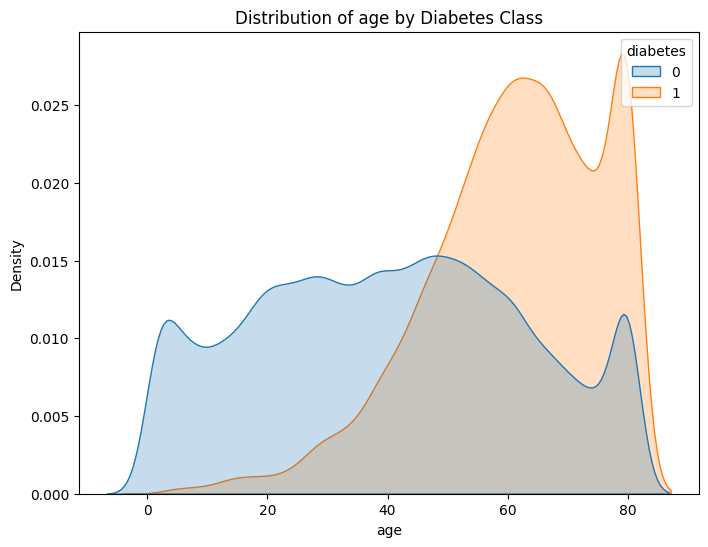

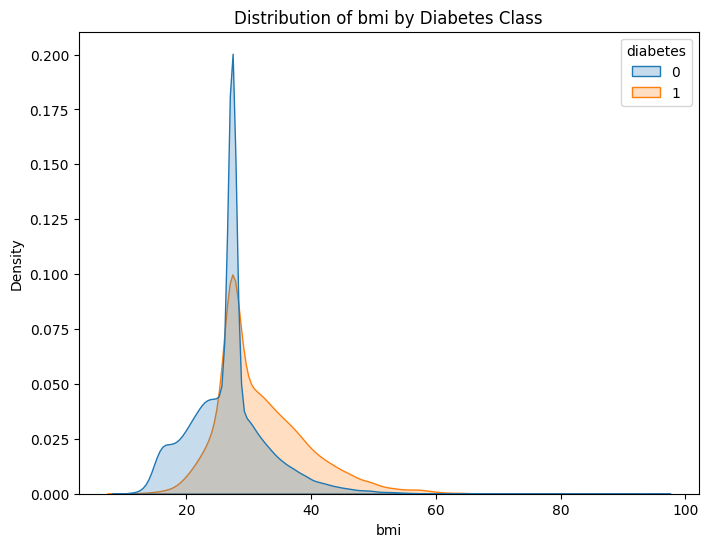

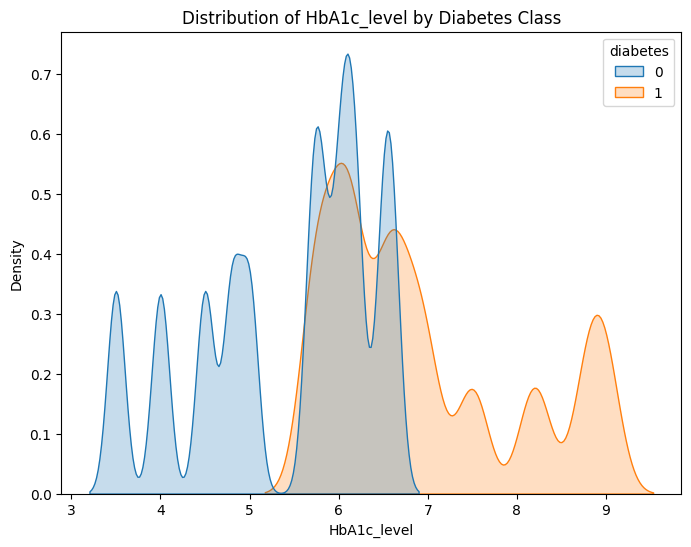

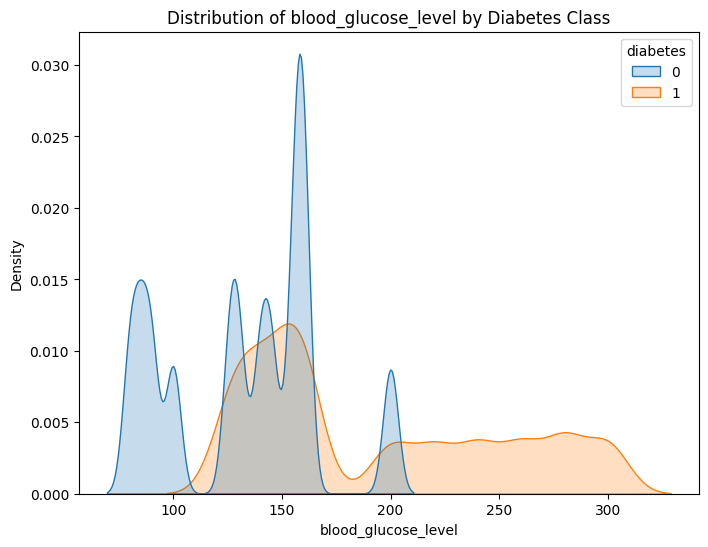

In [55]:
'''plot distribution of each column with two classes for diabetes'''
#plot distribution of each column with two classes for diabetes
columns_to_plot = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

for column in columns_to_plot:
    plt.figure(figsize=(8, 6))
    sns.kdeplot(data=diabetes_df, x=column, hue='diabetes', fill=True, common_norm=False)
    plt.title(f'Distribution of {column} by Diabetes Class')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.show()

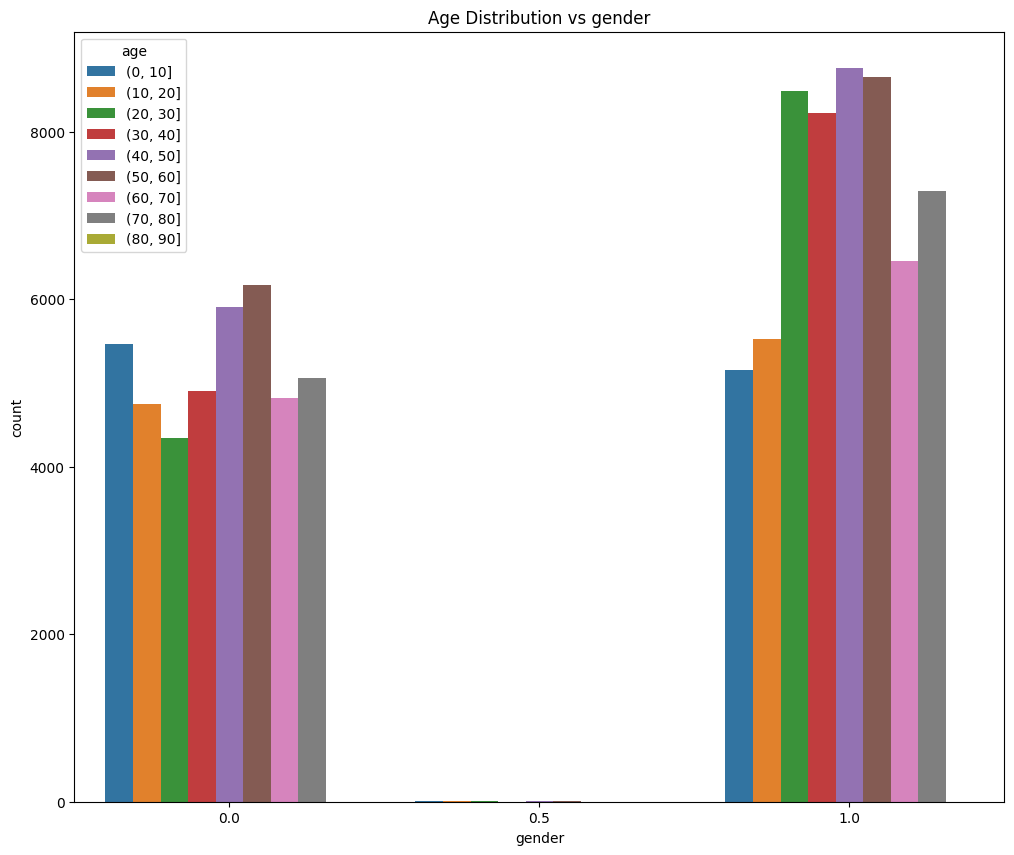

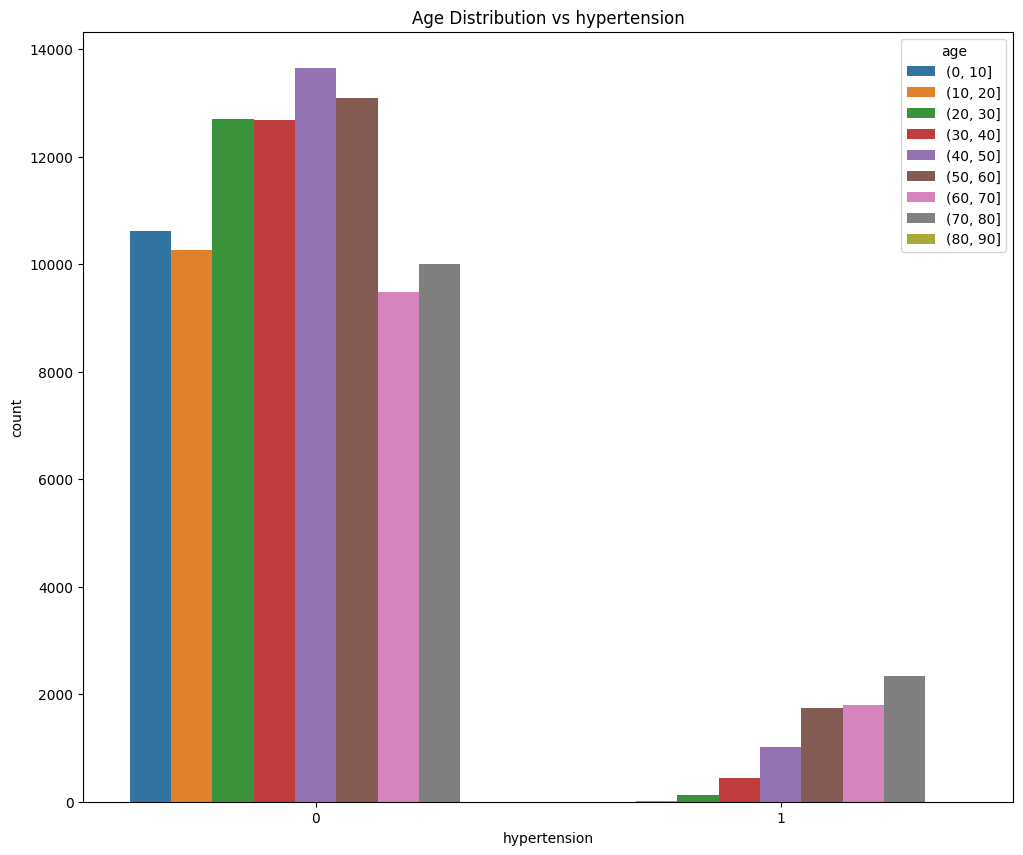

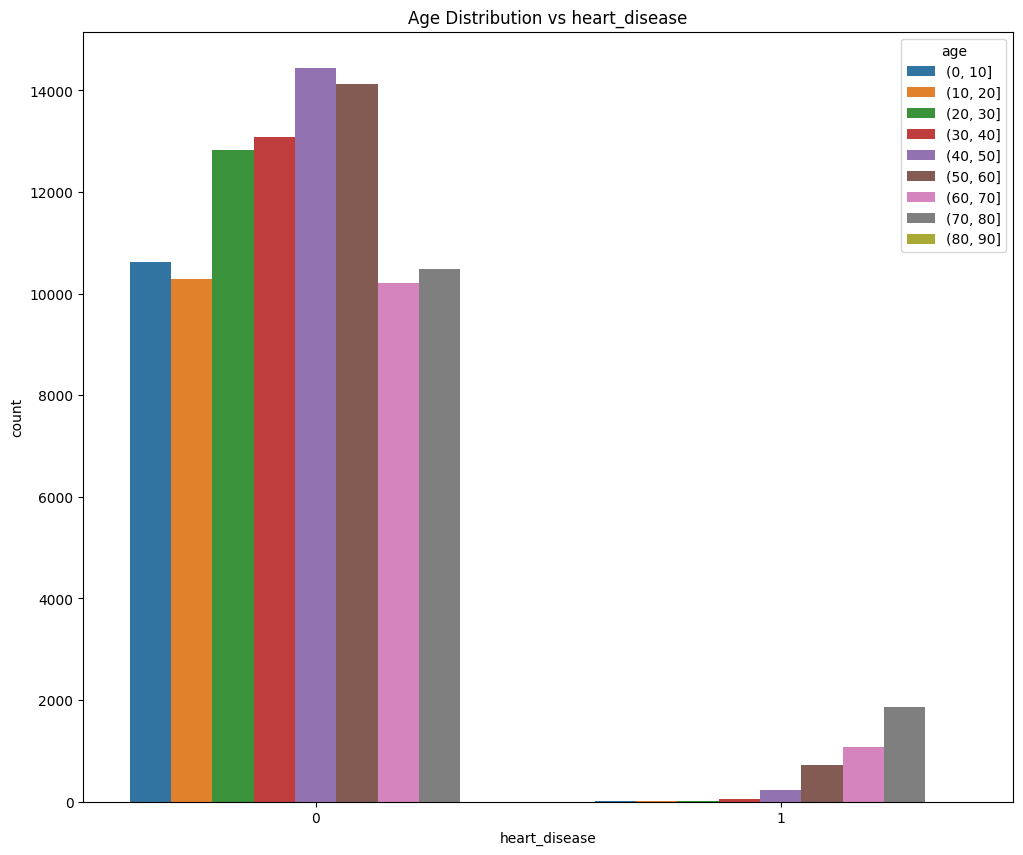

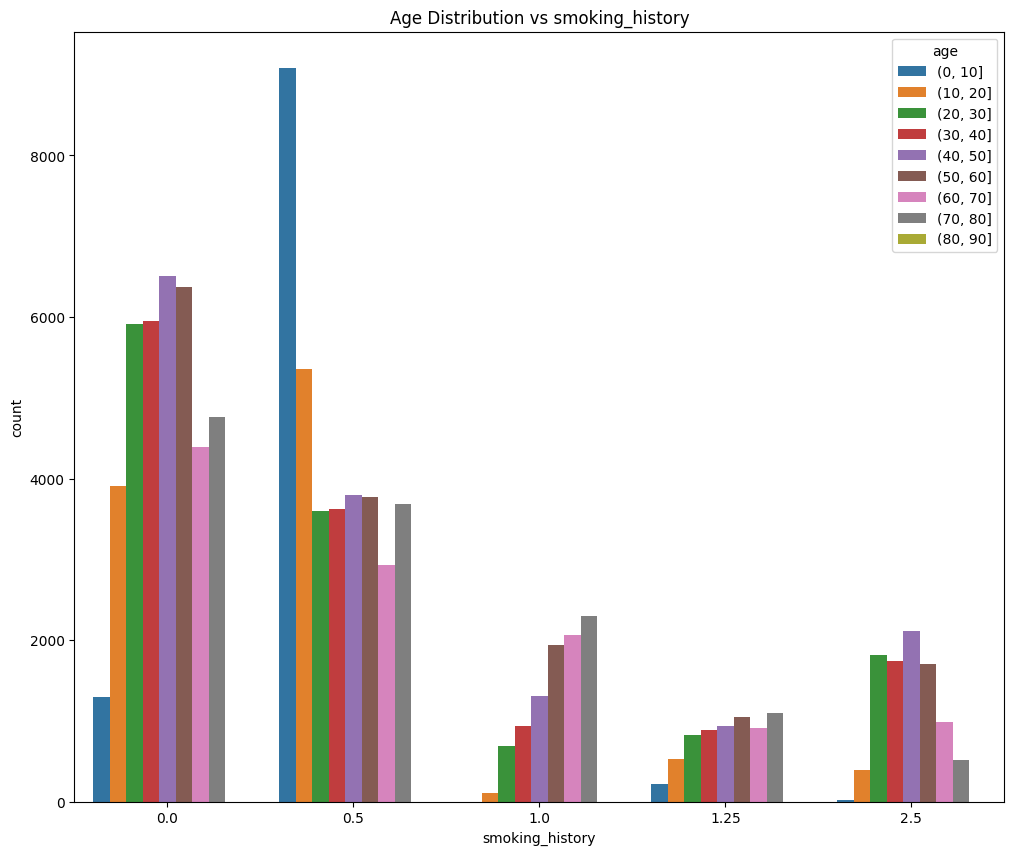

In [56]:
numeric_col = ['age', 'bmi', 'blood_glucose_level', 'HbA1c_level']
non_numeric_col = ['gender', 'hypertension', 'heart_disease', 'smoking_history']

#plot distribution of each column with two classes for diabetes
age_group = pd.cut(diabetes_df['age'], bins=[0, 10,20,30,40,50,60,70,80,90])
for col in non_numeric_col:
    plt.figure(figsize = (12,10))
    sns.countplot(x = diabetes_df[col], data = diabetes_df, hue = age_group)
    plt.title(f"Age Distribution vs {col}")
    plt.show()

## Training XGBoost Model

In [57]:
diabetes_df_model = diabetes_df.copy()
'''remove 90% of the rows that have 0 as the value for diabetes'''
db_df_0 = diabetes_df[diabetes_df['diabetes'] == 0].sample(frac=0.23, random_state=42)
db_df_1 = diabetes_df[diabetes_df['diabetes'] == 1]
diabetes_df_model = pd.concat([db_df_0, db_df_1])
X = diabetes_df_model.drop(['diabetes'], axis=1)
y = diabetes_df_model.diabetes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
X_train.head()


(23636, 8)
(5909, 8)
(23636,)
(5909,)


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
40071,1.0,63.0,0,0,0.5,27.32,6.6,240
2535,1.0,25.0,0,0,0.0,42.12,4.5,160
67037,0.0,52.0,0,0,0.5,27.32,3.5,100
33202,0.0,11.0,0,0,0.5,21.23,6.5,159
48367,0.0,70.0,1,0,1.0,27.32,6.0,155


In [58]:
model = xgb.XGBClassifier(n_estimators = 5000, learning_rate = 0.001, n_jobs = 4)
model_train = model.fit(X_train, y_train, early_stopping_rounds = 10, eval_set = [(X_valid, y_valid)], verbose = True)
'''Visualizations for training and validation loss'''




/Users/samvrit/miniconda3/envs/myenv/lib/python3.9/site-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.61066
[1]	validation_0-logloss:0.60995
[2]	validation_0-logloss:0.60925
[3]	validation_0-logloss:0.60854
[4]	validation_0-logloss:0.60784
[5]	validation_0-logloss:0.60714
[6]	validation_0-logloss:0.60644
[7]	validation_0-logloss:0.60575
[8]	validation_0-logloss:0.60506
[9]	validation_0-logloss:0.60436
[10]	validation_0-logloss:0.60367
[11]	validation_0-logloss:0.60299
[12]	validation_0-logloss:0.60230
[13]	validation_0-logloss:0.60161
[14]	validation_0-logloss:0.60093
[15]	validation_0-logloss:0.60025
[16]	validation_0-logloss:0.59957
[17]	validation_0-logloss:0.59889
[18]	validation_0-logloss:0.59822
[19]	validation_0-logloss:0.59754
[20]	validation_0-logloss:0.59687
[21]	validation_0-logloss:0.59620
[22]	validation_0-logloss:0.59553
[23]	validation_0-logloss:0.59487
[24]	validation_0-logloss:0.59420
[25]	validation_0-logloss:0.59354
[26]	validation_0-logloss:0.59287
[27]	validation_0-logloss:0.59221
[28]	validation_0-logloss:0.59156
[29]	validation_0-loglos

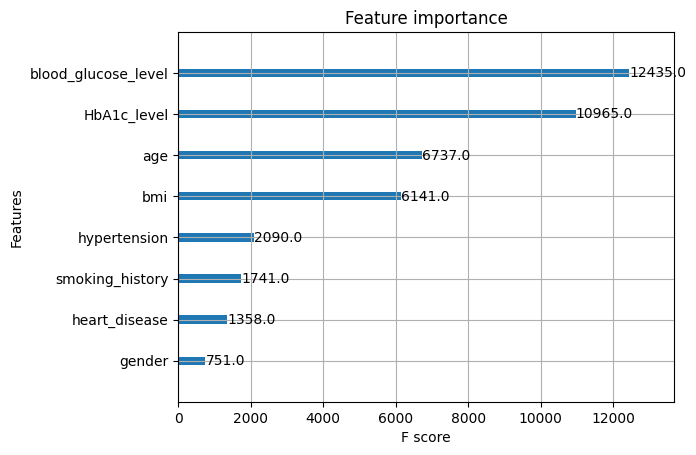

In [70]:
'''plot weightage of each feature'''
xgb.plot_importance(model_train)
plt.rcParams['figure.figsize'] = [5, 5]

ERROR: Could not find a version that satisfies the requirement GridSearchCV (from versions: none)
ERROR: No matching distribution found for GridSearchCV


In [81]:
from sklearn.model_selection import GridSearchCV
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = xgb.XGBClassifier(learning_rate =0.001, n_estimators=5000, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4, cv=5,)
gsearch1.fit(X_train,y_train)
gsearch1.grid_scores_, 

AttributeError: 'GridSearchCV' object has no attribute 'grid_scores_'

In [82]:
gsearch1.best_params_, gsearch1.best_score_
'''plot 3d graph of max_depth and min_child_weight'''
, 

({'max_depth': 7, 'min_child_weight': 5}, 0.9788109021069875)

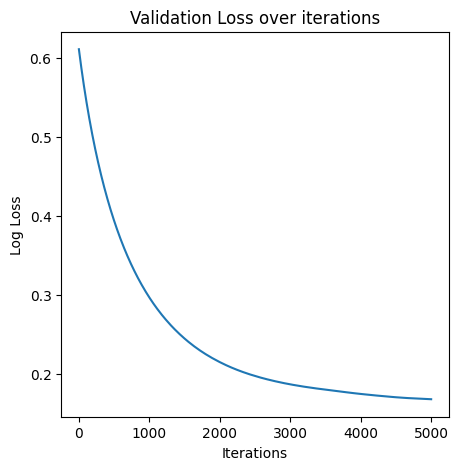

In [73]:
'''validation loss over iterations'''
results = model_train.evals_result()
losses = results['validation_0']['logloss']

plt.title('Validation Loss over iterations')
plt.xlabel('Iterations')
plt.ylabel('Log Loss')
plt.plot(losses)

In [75]:
'''get best hyperparams'''
print(model_train.coef_)

AttributeError: Coefficients are not defined for Booster type None

In [65]:
preds = model.predict(X_test)

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

print("Model w/ XGBoost Performance",  classification_report(y_test, preds))
print("Model w/ XGBoost Accuracy",  (accuracy_score(y_test, preds)* 100))



Model w/ XGBoost Performance               precision    recall  f1-score   support

           0       0.92      0.98      0.95      4202
           1       0.93      0.79      0.85      1707

    accuracy                           0.92      5909
   macro avg       0.93      0.88      0.90      5909
weighted avg       0.92      0.92      0.92      5909

Model w/ XGBoost Accuracy 92.2660348620748


In [60]:
cm = confusion_matrix(y_test, preds)
print(cm)

[[4107   95]
 [ 362 1345]]


In [61]:
TP = cm[0][0]
TN = cm[1][1]
FP = cm[0][1]
FN = cm[1][0]
print(type(FN))

BER = 1 - 0.5 * (TP/(TP+FN) + TN/(TN+FP))
print("Balanced Error Rate: ", BER)
CER = 1 - 0.5 * ((TP/(TP+ 5*FN ) +  TN/(TN+FP)))
print("Custom Error Rate: ", CER)

<class 'numpy.int64'>
Balanced Error Rate:  0.07348734181149152
Custom Error Rate:  0.18593524073761103


In [62]:
# Assuming diabetes_df is your DataFrame
# Replace 'diabetes_df' with the actual DataFrame name

# Group by the 'diabetes' column and calculate mean and standard deviation for each group
diabetes_0_data = diabetes_df[diabetes_df['diabetes'] == 0]
diabetes_1_data = diabetes_df[diabetes_df['diabetes'] == 1]

# List of features to analyze
features_to_analyze = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

# Iterate over each feature and print statistics for each class
for feature in features_to_analyze:
    print(f"\nStatistics for {feature}:\n")
    print("Diabetes == 0:\n", diabetes_0_data[feature].describe())
    print("\nDiabetes == 1:\n", diabetes_1_data[feature].describe())
    print("\n" + "="*40)  # Separator line



Statistics for age:

Diabetes == 0:
 count    91500.000000
mean        40.115187
std         22.306005
min          0.080000
25%         22.000000
50%         40.000000
75%         57.000000
max         80.000000
Name: age, dtype: float64

Diabetes == 1:
 count    8500.000000
mean       60.946588
std        14.549880
min         3.000000
25%        52.000000
50%        62.000000
75%        72.000000
max        80.000000
Name: age, dtype: float64


Statistics for bmi:

Diabetes == 0:
 count    91500.000000
mean        26.887163
std          6.373406
min         10.010000
25%         23.240000
50%         27.320000
75%         28.870000
max         95.690000
Name: bmi, dtype: float64



Diabetes == 1:
 count    8500.000000
mean       31.988382
std         7.558371
min        10.980000
25%        27.320000
50%        29.970000
75%        35.912500
max        88.720000
Name: bmi, dtype: float64


Statistics for HbA1c_level:

Diabetes == 0:
 count    91500.000000
mean         5.396761
std          0.971628
min          3.500000
25%          4.800000
50%          5.800000
75%          6.200000
max          6.600000
Name: HbA1c_level, dtype: float64

Diabetes == 1:
 count    8500.000000
mean        6.934953
std         1.076562
min         5.700000
25%         6.100000
50%         6.600000
75%         7.500000
max         9.000000
Name: HbA1c_level, dtype: float64


Statistics for blood_glucose_level:

Diabetes == 0:
 count    91500.000000
mean       132.852470
std         34.247281
min         80.000000
25%        100.000000
50%        140.000000
75%        158.000000
max        200.000000
Name: blood_glucose_level, dtype: float64

Diabetes == 1:
 count    8500.000000
me

<Axes: >

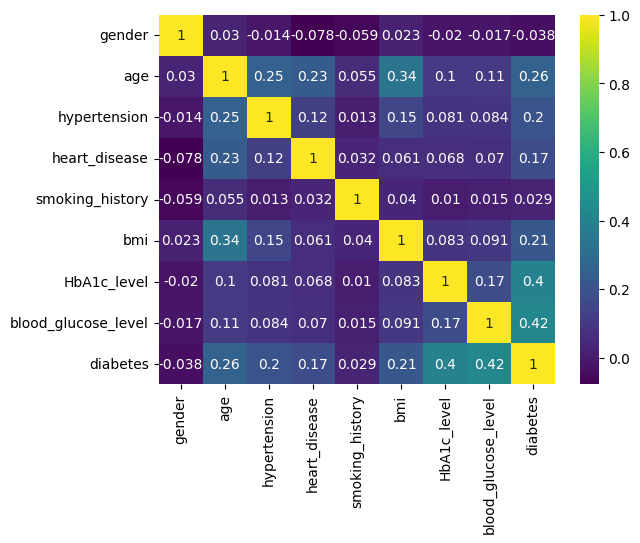

In [63]:
sns.heatmap(diabetes_df.corr(), annot=True, cmap='viridis')